In [1]:
import numpy
from scipy import linalg, special, integrate
from scipy.integrate import solve_ivp
import matplotlib
from matplotlib import pyplot

from tqdm.notebook import tqdm

import joblib

import born_markov as bmme

In [2]:
d_ops, d_dags = bmme.generate_fermionic_ops(2)

omega = .003
g = .0075
t = .01
Gamma = .01
Gammas = numpy.zeros((2,2,2))
Gammas[1,1,0] = Gamma
T = .01 / bmme.k_B # 116

def func_H_s(x):
    H_s = .5 * omega * x[0]**2 * numpy.identity(d_ops[0].shape[0])
    H_s += g * x[0] * numpy.sqrt(2) * d_dags[0] @ d_ops[0]
    H_s += t * (d_dags[0] @ d_ops[1] + d_dags[1] @ d_ops[0])
    return H_s

def func_ddx_H_s(k, x):
    ddx = omega * x[0] * numpy.identity(d_ops[0].shape[0])
    ddx += g * numpy.sqrt(2) * d_dags[0] @ d_ops[0]
    return ddx

def diagonalize(matrix):
    return numpy.linalg.eig(matrix)

def my_func(i, val):
    return bmme.calc_langevin_quantities(func_H_s, func_ddx_H_s, [val], d_ops, None, Gammas, 0, 0, T, T, diagonalize=diagonalize, include_digamma=False)

def my_func2(i, val):
    solver = bmme.general_solver(func_H_s([val]), d_ops, None, Gammas, 0, 0, T, T, diagonalize=diagonalize, include_digamma=False)
    r, L = solver.find_steady_state()
    return solver.V @ r @ solver.V_dag

x = numpy.linspace(-10, 10, 500)

mean_force1 = numpy.zeros(len(x), dtype=numpy.float64)
friction1 = numpy.zeros(len(x), dtype=numpy.float64)
correlation1 = numpy.zeros(len(x), dtype=numpy.float64)
#rho1 = numpy.zeros((len(x), 4, 4), dtype=numpy.complex128)

results = joblib.Parallel(n_jobs=6)(joblib.delayed(my_func)(i, val) for i, val in enumerate(tqdm(x)))
#results2 = joblib.Parallel(n_jobs=6)(joblib.delayed(my_func2)(i, val) for i, val in enumerate(tqdm(x)))

for i in range(len(results)):
    if abs(results[i][0].imag) > 1e-10:
        print("ALARM!!! Mean force")
    mean_force1[i] = results[i][0].real
    if abs(results[i][1].imag) > 1e-10:
        print("ALARM!!! Friction")
    friction1[i] = results[i][1].real
    if abs(results[i][2].imag) > 1e-10:
        print("ALARM!!! Correlation")
    correlation1[i] = results[i][2].real

numpy.savetxt("data/anderson_hopping/mean_force_"+str(Gamma), numpy.array([x, mean_force1]))
numpy.savetxt("data/anderson_hopping/friction_"+str(Gamma), numpy.array([x, friction1]))
numpy.savetxt("data/anderson_hopping/correlation_"+str(Gamma), numpy.array([x, correlation1]))

#for i in range(len(results2)):
#    rho1[i] = results2[i]

Gamma = .02
Gammas = numpy.zeros((2,2,2))
Gammas[1,1,0] = Gamma
    
mean_force2 = numpy.zeros(len(x), dtype=numpy.float64)
friction2 = numpy.zeros(len(x), dtype=numpy.float64)
correlation2 = numpy.zeros(len(x), dtype=numpy.float64)
#rho2 = numpy.zeros((len(x), 4, 4), dtype=numpy.complex128)

results = joblib.Parallel(n_jobs=6)(joblib.delayed(my_func)(i, val) for i, val in enumerate(tqdm(x)))
#results2 = joblib.Parallel(n_jobs=6)(joblib.delayed(my_func2)(i, val) for i, val in enumerate(tqdm(x)))

for i in range(len(results)):
    if abs(results[i][0].imag) > 1e-10:
        print("ALARM!!! Mean force")
    mean_force2[i] = results[i][0].real
    if abs(results[i][1].imag) > 1e-10:
        print("ALARM!!! Friction")
    friction2[i] = results[i][1].real
    if abs(results[i][2].imag) > 1e-10:
        print("ALARM!!! Correlation")
    correlation2[i] = results[i][2].real

numpy.savetxt("data/anderson_hopping/mean_force_"+str(Gamma), numpy.array([x, mean_force2]))
numpy.savetxt("data/anderson_hopping/friction_"+str(Gamma), numpy.array([x, friction2]))
numpy.savetxt("data/anderson_hopping/correlation_"+str(Gamma), numpy.array([x, correlation2]))

#for i in range(len(results2)):
#    rho2[i] = results2[i]

  0%|          | 0/500 [00:00<?, ?it/s]

ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! F

  0%|          | 0/500 [00:00<?, ?it/s]

ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! Friction
ALARM!!! F

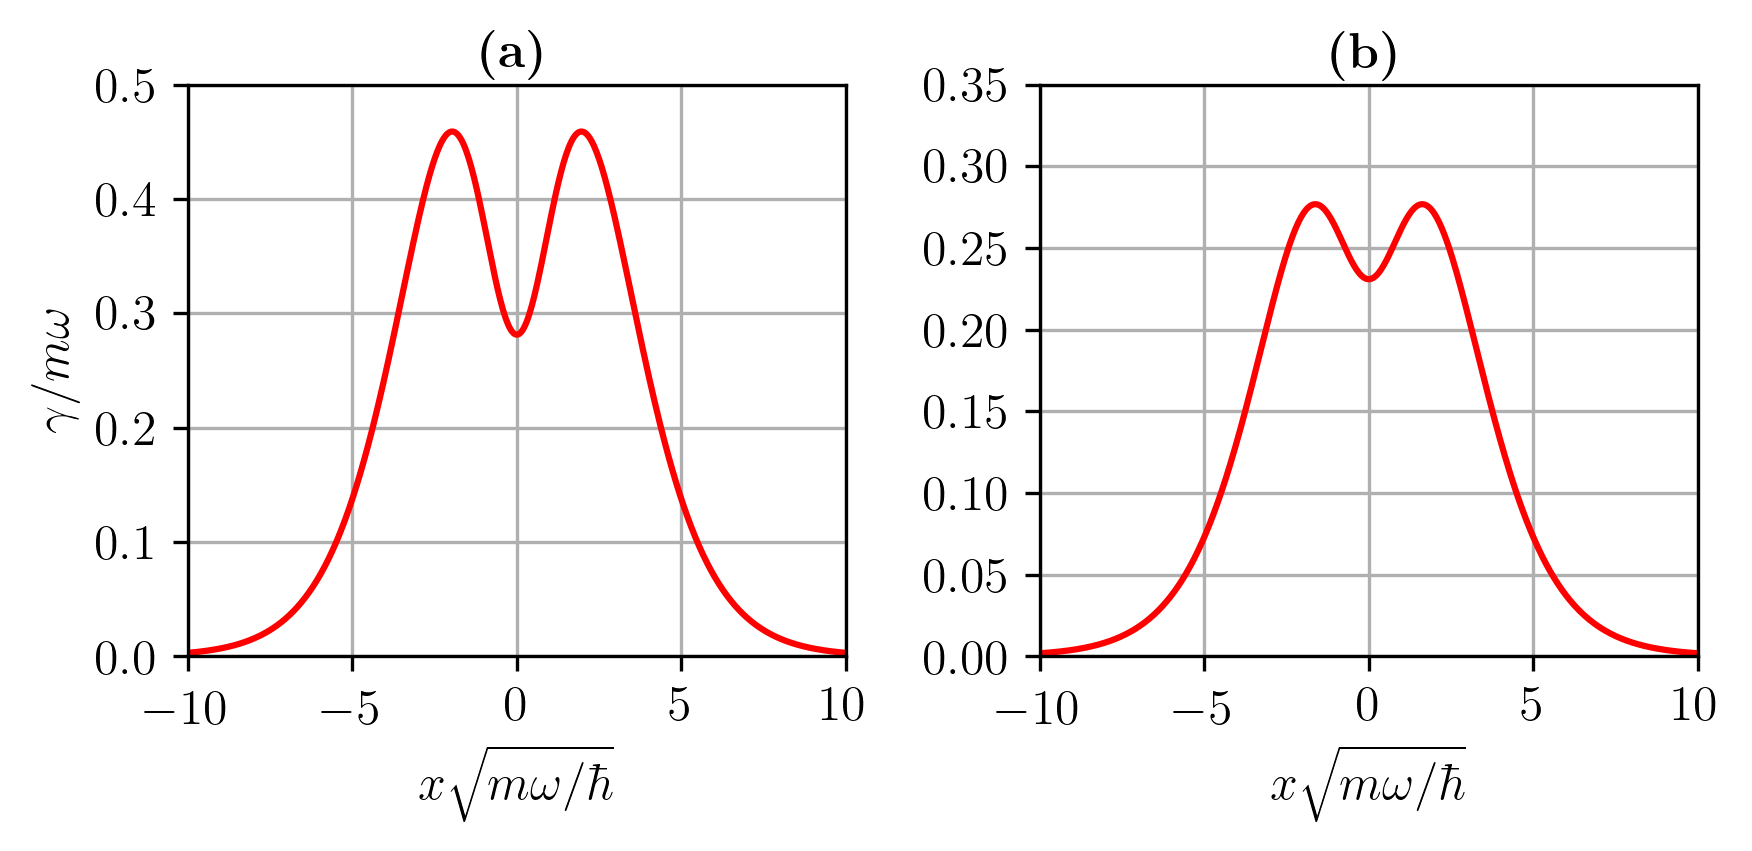

In [23]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(6, 3), tight_layout=True)

x = numpy.linspace(-10, 10, 500)

friction1 = numpy.loadtxt("data/anderson_hopping/friction_0.01")
friction2 = numpy.loadtxt("data/anderson_hopping/friction_0.02")

ax1.plot(friction1[0], bmme._hbar * friction1[1], c="red")
ax1.set_xlabel("$x\\sqrt{m\\omega/\\hbar}$")
ax1.set_ylabel("$\\gamma/m\\omega$")
ax1.set_xlim(-10, 10)
ax1.set_xticks([-10, -5, 0, 5, 10])
ax1.set_ylim(.0, .5)
ax1.set_yticks([.0, .1, .2, .3, .4, .5])
ax1.grid()
ax1.text(0, .505, "\\textbf{(a)}", ha="center", va="bottom")

ax2.plot(friction2[0], bmme._hbar * friction2[1], c="red")
ax2.set_xlabel("$x\\sqrt{m\\omega/\\hbar}$")
#ax2.set_ylabel("$\\gamma/m\\omega$")
ax2.set_xlim(-10, 10)
ax2.set_xticks([-10, -5, 0, 5, 10])
ax2.set_ylim(.0, .35)
ax2.set_yticks([.0, .05, .1, .15, .2, .25, .3, .35])
ax2.grid()
ax2.text(0, .353, "\\textbf{(b)}", ha="center", va="bottom")

pyplot.savefig("qcle_cme1.pdf")
pyplot.gcf().set_dpi(300)
pyplot.show()

In [17]:
d_ops, d_dags = bmme.generate_fermionic_ops(2)

omega = .003
g = .0075
t = .0
Gamma = .01
Gammas = numpy.zeros((2,2,2))
Gammas[:,:,0] = [[Gamma, -Gamma], [-Gamma, Gamma]]
Delta = .01
T = .01 / bmme.k_B # 116
voltage = .0

def func_H_s(x):
    H_s = .5 * omega * x[0]**2 * numpy.identity(d_ops[0].shape[0])
    H_s += (g * x[0] * numpy.sqrt(0.5) - numpy.sqrt((x[0] * g)**2 / 2 + Delta**2)) * d_dags[0] @ d_ops[0]
    H_s += (g * x[0] * numpy.sqrt(0.5) + numpy.sqrt((x[0] * g)**2 / 2 + Delta**2)) * d_dags[1] @ d_ops[1]
    H_s += t * (d_dags[0] @ d_ops[1] + d_dags[1] @ d_ops[0])
    return H_s

def func_ddx_H_s(k, x):
    ddx = omega * x[0] * numpy.identity(d_ops[0].shape[0])
    ddx += (g * numpy.sqrt(0.5) - (g**2 / 2) * x[0] / numpy.sqrt((x[0] * g)**2 / 2 + Delta**2)) * d_dags[0] @ d_ops[0]
    ddx += (g * numpy.sqrt(0.5) + (g**2 / 2) * x[0] / numpy.sqrt((x[0] * g)**2 / 2 + Delta**2)) * d_dags[1] @ d_ops[1]
    return ddx

x = numpy.linspace(-10, 10, 500)

mean_force = numpy.zeros(len(x), dtype=numpy.float64)
friction = numpy.zeros(len(x), dtype=numpy.float64)
correlation = numpy.zeros(len(x), dtype=numpy.float64)
rho = numpy.zeros((len(x), 4, 4), dtype=numpy.complex128)

def diagonalize(matrix):
    return numpy.linalg.eig(matrix)

def my_func(i, val):
    return bmme.calc_langevin_quantities(func_H_s, func_ddx_H_s, [val], d_ops, None, Gammas, -.5 * voltage, numpy.inf, T, T, diagonalize=diagonalize, include_digamma=False)

def my_func2(i, val):
    solver = bmme.general_solver(func_H_s([val]), d_ops, None, Gammas, -.5 * voltage, numpy.inf, T, T, diagonalize=diagonalize, include_digamma=False)
    r, L = solver.find_steady_state()
    return solver.V @ r @ solver.V_dag

results = joblib.Parallel(n_jobs=6)(joblib.delayed(my_func)(i, val) for i, val in enumerate(tqdm(x)))
#results2 = joblib.Parallel(n_jobs=6)(joblib.delayed(my_func2)(i, val) for i, val in enumerate(tqdm(x)))

for i in range(len(results)):
    if abs(results[i][0].imag) > 1e-10:
        print("ALARM!!! Mean force")
    mean_force[i] = results[i][0].real
    if abs(results[i][1].imag) > 1e-10:
        print("ALARM!!! Friction")
    friction[i] = results[i][1].real
    if abs(results[i][2].imag) > 1e-10:
        print("ALARM!!! Correlation")
    correlation[i] = results[i][2].real

numpy.savetxt("data/anderson_hopping/model2_mean_force", numpy.array([x, mean_force]))
numpy.savetxt("data/anderson_hopping/model2_friction", numpy.array([x, friction]))
numpy.savetxt("data/anderson_hopping/model2_correlation", numpy.array([x, correlation]))

#for i in range(len(results2)):
#    rho[i] = results2[i]
        
#pmf = numpy.zeros(len(x), dtype=numpy.float64)
#for i in range(len(x)):
#    pmf[i] = -numpy.sum(mean_force[:i+1]) * (max(x) - min(x)) / (len(x) - 1)

  0%|          | 0/500 [00:00<?, ?it/s]

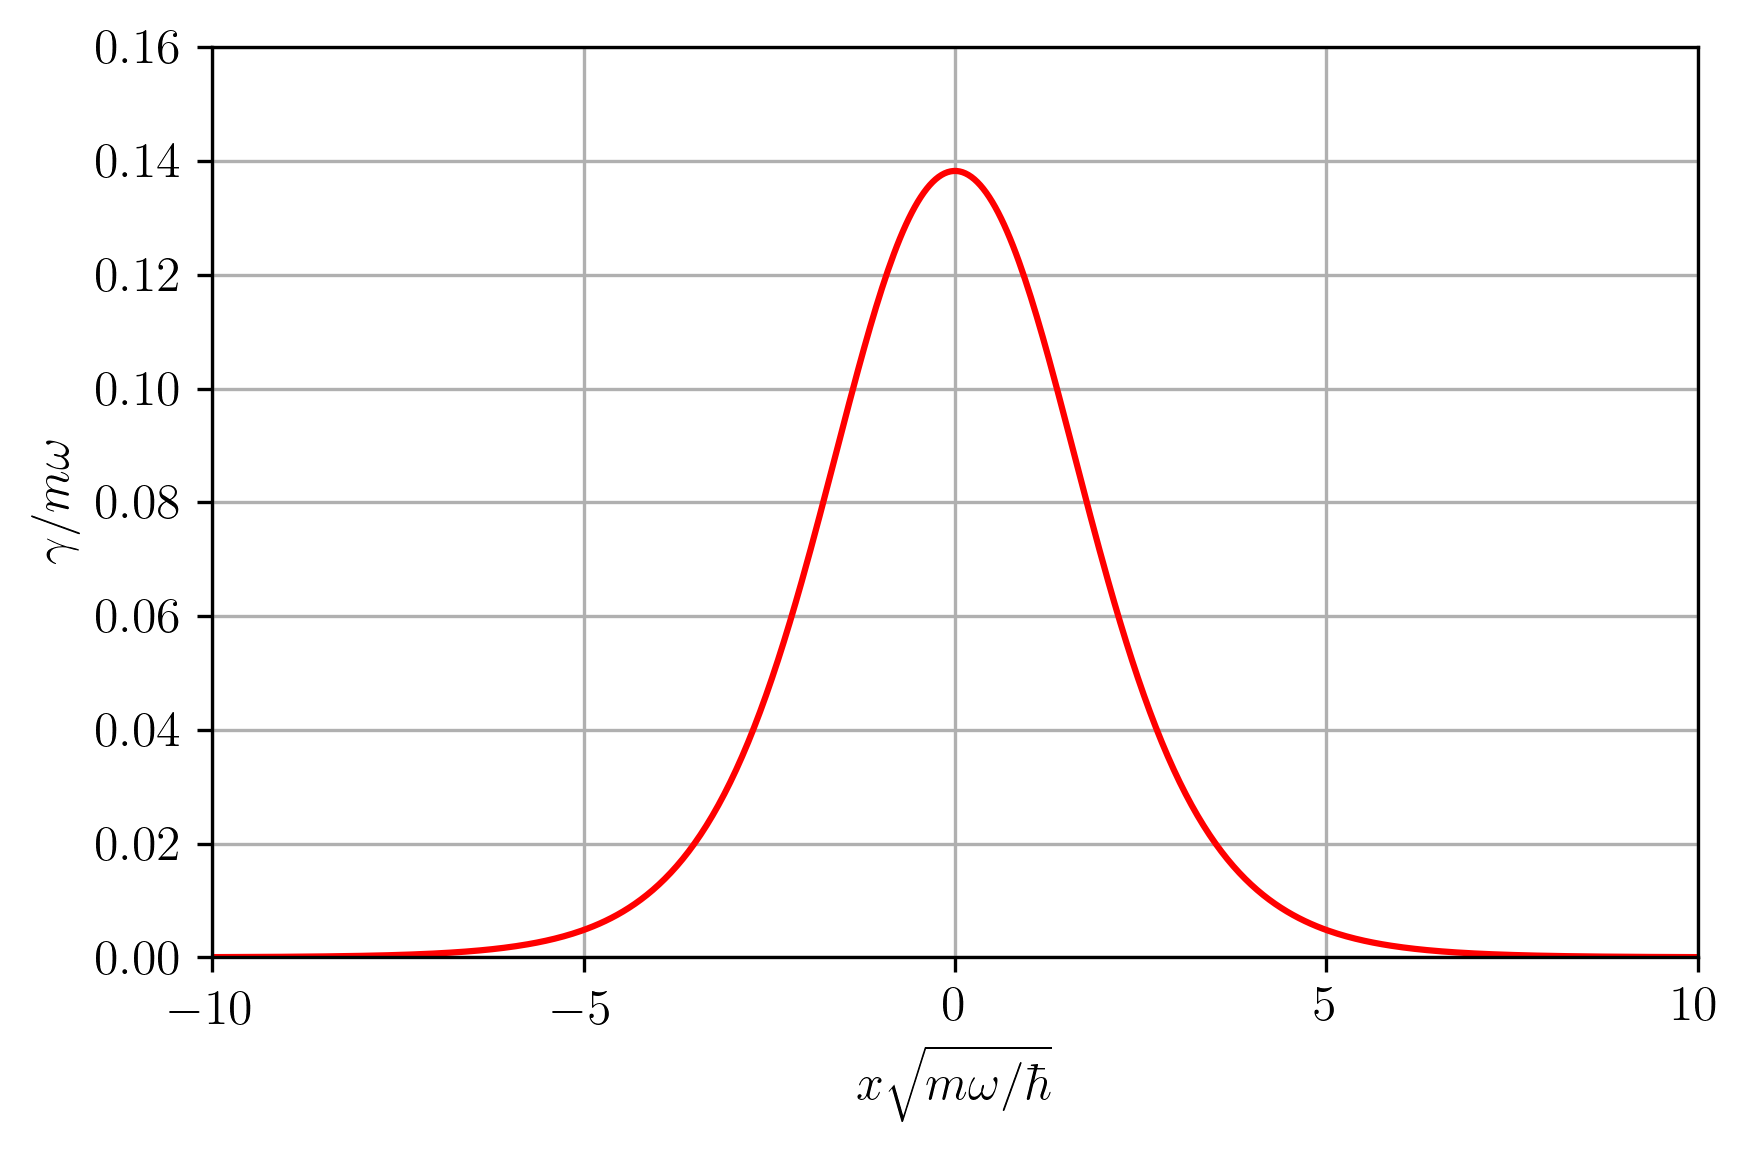

In [20]:
pyplot.figure(figsize=(6, 4), tight_layout=True)

friction = numpy.loadtxt("data/anderson_hopping/model2_friction")

pyplot.plot(friction[0], bmme._hbar * friction[1], c="red")
pyplot.xlabel("$x\\sqrt{m\\omega/\\hbar}$")
pyplot.ylabel("$\\gamma/m\\omega$")
pyplot.xlim(-10, 10)
pyplot.xticks([-10, -5, 0, 5, 10])
pyplot.ylim(.0, .16)
pyplot.grid()
pyplot.savefig("qcle_cme2.pdf")
pyplot.gcf().set_dpi(300)
pyplot.show()